# Data
application_train/application_test: data pelatihan dan pengujian utama dengan informasi tentang setiap aplikasi pinjaman di Home Credit. Setiap pinjaman memiliki barisnya masing-masing dan ditandai dengan fitur SK_ID_CURR. Data aplikasi pelatihan dilengkapi dengan TARGET yang menunjukkan 0: pinjaman telah dilunasi atau 1: pinjaman tidak dilunasi.

bureau: data mengenai kredit klien sebelumnya dari lembaga keuangan lain. Setiap kredit sebelumnya memiliki barisnya sendiri di biro, tetapi satu pinjaman dalam data aplikasi dapat memiliki beberapa kredit sebelumnya.

bureau_balance: data bulanan tentang kredit sebelumnya di biro. Setiap baris adalah satu bulan dari kredit sebelumnya, dan satu kredit sebelumnya dapat memiliki beberapa baris, satu untuk setiap bulan dari panjang kredit.

previous_application: aplikasi sebelumnya untuk pinjaman di Home Credit klien yang memiliki pinjaman dalam data aplikasi. Setiap pinjaman saat ini dalam data aplikasi dapat memiliki beberapa pinjaman sebelumnya. Setiap aplikasi sebelumnya memiliki satu baris dan diidentifikasi oleh fitur SK_ID_PREV.

POS_CASH_BALANCE: data bulanan tentang titik penjualan sebelumnya atau pinjaman tunai yang dimiliki klien dengan Home Credit. Setiap baris adalah satu bulan dari titik penjualan atau pinjaman tunai sebelumnya, dan satu pinjaman sebelumnya dapat memiliki banyak baris.

credit_card_balance: data bulanan tentang kartu kredit sebelumnya yang dimiliki klien dengan Home Credit. Setiap baris adalah satu bulan dari saldo kartu kredit, dan satu kartu kredit dapat memiliki banyak baris.

installments_payment: riwayat pembayaran untuk pinjaman sebelumnya di Home Credit. Ada satu baris untuk setiap pembayaran yang dilakukan dan satu baris untuk setiap pembayaran yang terlewatkan.



![image](https://drive.google.com/uc?id=1uMUlwp_cnYv8sIfGPgiXf-uxBxAzptqM)


In [ ]:
#import libraries
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
application_bureau_prev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_bureau_prev.csv')
application_bureau_prev_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_bureau_prev_test.csv')

In [ ]:
application_bureau_prev.head()

,Unnamed: 0.1,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,POS_NAME_CONTRACT_STATUS_Demand,POS_NAME_CONTRACT_STATUS_Returned to the store,POS_NAME_CONTRACT_STATUS_Signed,POS_NAME_CONTRACT_STATUS_XNA,INSTA_NUM_INSTALMENT_VERSION,INSTA_NUM_INSTALMENT_NUMBER,INSTA_DAYS_INSTALMENT,INSTA_DAYS_ENTRY_PAYMENT,INSTA_AMT_INSTALMENT,INSTA_AMT_PAYMENT
0,0,0,100002,0,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.000000,0.000000,0.0,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
1,1,1,100003,0,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.000000,0.000000,0.0,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
2,2,2,100004,1,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.000000,0.000000,0.0,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
3,3,3,100006,0,0,1,0,135000.0,312682.5,29686.5,...,0.0,0.047619,0.000000,0.0,1.125000,4.437500,-252.250000,-271.625000,62947.088438,62947.088438
4,4,4,100007,0,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.000000,0.015152,0.0,1.166667,7.045455,-1028.606061,-1032.242424,12666.444545,12214.060227


# Feature Engineering


In [ ]:
insta_payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/installments_payments.csv')

In [ ]:
# Menggabungkan fitur numerik dan tidak ada fitur kategorikal dalam dataset ini
grp = insta_payments.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['INSTA_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
# Update the columns with fillna(0)
cols_to_update = [col for col in grp.columns if col in application_bureau_prev.columns]
application_bureau_prev[cols_to_update] = application_bureau_prev[cols_to_update].fillna(0)

# Merge the grp dataframe with application_bureau_prev
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left', suffixes=('_x', '_y'))

# Update the columns with fillna(0)
cols_to_update2 = [col for col in grp.columns if col in application_bureau_prev_test.columns]
application_bureau_prev_test[cols_to_update2] = application_bureau_prev_test[cols_to_update2].fillna(0)

# Merge the grp dataframe with application_bureau_prev_test
application_bureau_prev_test = application_bureau_prev_test.merge(grp, on=['SK_ID_CURR'], how='left', suffixes=('_x', '_y'))


In [ ]:
import gc

In [ ]:
gc.collect()

8

## Data Credit card balance 


In [ ]:
bureau_balance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bureau_balance.csv')
credit_card_balance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_card_balance.csv')

In [ ]:
credit_card = credit_card_balance

# Convert non-numeric columns to numeric
non_numeric_cols = credit_card.select_dtypes(exclude='number').columns
credit_card[non_numeric_cols] = credit_card[non_numeric_cols].apply(pd.to_numeric, errors='coerce')

# Menggabungkan fitur numerik
grp = credit_card.drop('SK_ID_PREV', axis=1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['CREDIT_' + column if column != 'SK_ID_CURR' else column for column in grp.columns]
grp.columns = prev_columns

application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

application_bureau_prev_test = application_bureau_prev_test.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev_test.update(application_bureau_prev_test[grp.columns].fillna(0))


In [ ]:
#import pandas as pd
#import numpy as np

EPSILON = 1e-10  # Small constant to avoid division by zero

def calculate_woe_iv(dataset, feature, target):
    grouped = dataset.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'All', 'sum': 'Bad'})
    grouped['Good'] = grouped['All'] - grouped['Bad']
    
    grouped['Distr_Good'] = grouped['Good'] / grouped['Good'].sum()
    grouped['Distr_Bad'] = grouped['Bad'] / grouped['Bad'].sum()
    grouped['WoE'] = np.log((grouped['Distr_Good'] + EPSILON) / (grouped['Distr_Bad'] + EPSILON))
    
    grouped['IV'] = (grouped['Distr_Good'] - grouped['Distr_Bad']) * grouped['WoE']
    iv = grouped['IV'].sum()
    
    grouped = grouped.sort_values(by='WoE')
    
    return grouped, iv

iv_columns = {}
for col in application_bureau_prev.columns:
    if col == 'TARGET':
        continue
    else:
        df, iv = calculate_woe_iv(application_bureau_prev, col, 'TARGET')
        iv_columns[col] = iv

# Filter columns based on IV threshold
iv_threshold = 0.1
list_of_columns = [col for col, iv in iv_columns.items() if iv > iv_threshold]
print(len(list_of_columns))

115


In [ ]:
#import pandas as pd
#import numpy as np

# def calculate_woe_iv(dataset, feature, target):
#     grouped = dataset.groupby(feature)[target].agg(['count', 'sum'])
#     grouped = grouped.rename(columns={'count': 'All', 'sum': 'Bad'})
#     grouped['Good'] = grouped['All'] - grouped['Bad']
    
#     grouped['Distr_Good'] = grouped['Good'] / grouped['Good'].sum()
#     grouped['Distr_Bad'] = grouped['Bad'] / grouped['Bad'].sum()
#     grouped['WoE'] = np.log(grouped['Distr_Good'] / grouped['Distr_Bad'])
#     grouped['WoE'] = grouped['WoE'].replace({np.inf: 0, -np.inf: 0})
    
#     grouped['IV'] = (grouped['Distr_Good'] - grouped['Distr_Bad']) * grouped['WoE']
#     iv = grouped['IV'].sum()
    
#     grouped = grouped.sort_values(by='WoE')
    
#     return grouped, iv

# for col in application_bureau_prev.columns:
#     if col == 'TARGET':
#         continue
#     else:
#         print('WoE and IV for column: {}'.format(col))
#         df, iv = calculate_woe_iv(application_bureau_prev, col, 'TARGET')
#         print(df)
#         print('IV score: {:.2f}'.format(iv))
#         print('\n')


# Data Split train, valid and test


In [ ]:
X=application_bureau_prev.drop(columns=['TARGET'])
y=application_bureau_prev['TARGET']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 61503 entries, 64282 to 175308
Series name: TARGET
Non-Null Count  Dtype
--------------  -----
61503 non-null  int64
dtypes: int64(1)
memory usage: 961.0 KB


In [ ]:
for col in X_train.columns:
  print(col)

Unnamed: 0.1
Unnamed: 0
SK_ID_CURR
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_

In [ ]:
print(list_of_columns)

['Unnamed: 0.1', 'Unnamed: 0', 'SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'COMMONAREA_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE', 'Percent_Days_employed', 'Annuity_as_percent_income', 'Credit_as_percent_income', 'BUREAU_DAYS_CREDIT', 'BUREAU_CREDIT_DAY_OVERDUE', 'BUREAU_DAYS_CREDIT_ENDDATE', 'BUREAU_DAYS_ENDDATE_FACT', 'BUREAU_



---



In [ ]:
if==0:
def check_data(X, y):
    # Check for missing values
    if X.isnull().sum().sum() > 0:
        print("Warning: Input data contains missing values. Imputing...")
        X.fillna(X.median(), inplace=True)
        
    # Check for invalid values
    if X.isin([np.inf, -np.inf]).sum().sum() > 0:
        print("Warning: Input data contains invalid values. Removing...")
        X = X.replace([np.inf, -np.inf], np.nan).dropna()
        y = y.loc[X.index]
        
    # Check target variable is binary
    if set(y.unique()) != set([0, 1]):
        raise ValueError("Target variable is not binary")
        
    return X, y
    
check_data(X_train, y_train)

# Pemilihan Fitur menggunakan Nilai Informasi dan Bobot Bukti

Ada banyak metode untuk pemilihan fitur. Beberapa di antaranya menyertakan kepentingan fitur menggunakan XGBoost dan RandomForest. Metode lainnya adalah eliminasi maju atau mundur dan Boruta. Di sini kami menggunakan salah satu metode yang paling umum untuk pemilihan fitur, Nilai informasi dan bobot bukti untuk menentukan pemilihan fitur untuk analisis risiko kredit.

Kode untuk menghitung IV dan WOE



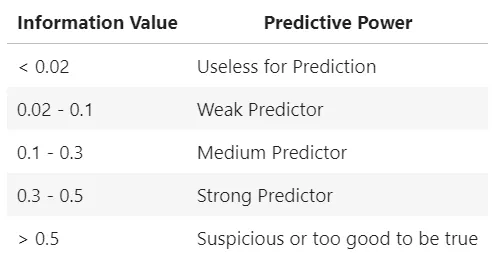

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61503 entries, 64282 to 175308
Columns: 495 entries, Unnamed: 0.1 to CREDIT_SK_DPD_DEF
dtypes: bool(2), float64(318), int64(175)
memory usage: 231.9 MB


In [ ]:
# def calculate_woe_iv(dataset, feature, target):
#     lst = []
#     for i in range(dataset[feature].nunique()):
#         val = list(dataset[feature].unique())[i]
#         lst.append({
#             'Value': val,
#             'All': dataset[dataset[feature] == val].count()[feature],
#             'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
#             'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
#         })
        
#     dset = pd.DataFrame(lst)
#     dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
#     dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
#     dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
#     dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
#     dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
#     iv = dset['IV'].sum()
    
#     dset = dset.sort_values(by='WoE')
    
#     return dset, iv

In [ ]:
# for col in application_bureau_prev.columns:
#     if col == 'TARGET': continue
#     else:
#         print('WoE and IV for column: {}'.format(col))
#         df, iv = calculate_woe_iv(application_bureau_prev, col, 'TARGET')
#         print(df)
#         print('IV score: {:.2f}'.format(iv))
#         print('\n')

In [ ]:
#!pip install --upgrade pandas

In [ ]:
gc.collect()

0

In [ ]:
# if==0:
# DO NOT RUN
# # to check monotonicity of a series
# def is_monotonic(temp_series):
#     return all(temp_series[i] <= temp_series[i + 1] for i in range(len(temp_series) - 1)) or all(temp_series[i] >= temp_series[i + 1] for i in range(len(temp_series) - 1))

# def prepare_bins(bin_data, c_i, target_col, max_bins):
#     force_bin = True
#     binned = False
#     remarks = np.nan
#     # ----------------- Monotonic binning -----------------
#     for n_bins in range(max_bins, 2, -1):
#         try:
#             bin_data[c_i + "_bins"] = pd.qcut(bin_data[c_i], n_bins, duplicates="drop")
#             monotonic_series = bin_data.groupby(c_i + "_bins")[target_col].mean().reset_index(drop=True)
#             if is_monotonic(monotonic_series):
#                 force_bin = False
#                 binned = True
#                 remarks = "binned monotonically"
#                 break
#         except:
#             pass
#     # ----------------- Force binning -----------------
#     # creating 2 bins forcefully because 2 bins will always be monotonic
#     if force_bin or (c_i + "_bins" in bin_data and bin_data[c_i + "_bins"].nunique() < 2):
#         _min=bin_data[c_i].min()
#         _mean=bin_data[c_i].mean()
#         _max=bin_data[c_i].max()
#         bin_data[c_i + "_bins"] = pd.cut(bin_data[c_i], [_min, _mean, _max], include_lowest=True)
#         if bin_data[c_i + "_bins"].nunique() == 2:
#             binned = True
#             remarks = "binned forcefully"
    
#     if binned:
#         return c_i + "_bins", remarks, bin_data[[c_i, c_i+"_bins", target_col]].copy()
#     else:
#         remarks = "couldn't bin"
#         return c_i, remarks, bin_data[[c_i, target_col]].copy()

# # calculate WOE and IV for every group/bin/class for a provided feature
# def iv_woe_4iter(binned_data, target_col, class_col):
#     if "_bins" in class_col:
#         binned_data[class_col] = binned_data[class_col].cat.add_categories(['Missing'])
#         binned_data[class_col] = binned_data[class_col].fillna("Missing")
#         temp_groupby = binned_data.groupby(class_col).agg({class_col.replace("_bins", ""):["min", "max"],
#                                                            target_col: ["count", "sum", "mean"]}).reset_index()
#     else:
#         binned_data[class_col] = binned_data[class_col].fillna("Missing")
#         temp_groupby = binned_data.groupby(class_col).agg({class_col:["first", "first"],
#                                                            target_col: ["count", "sum", "mean"]}).reset_index()
    
#     temp_groupby.columns = ["sample_class", "min_value", "max_value", "sample_count", "event_count", "event_rate"]
#     temp_groupby["non_event_count"] = temp_groupby["sample_count"] - temp_groupby["event_count"]
#     temp_groupby["non_event_rate"] = 1 - temp_groupby["event_rate"]
#     temp_groupby = temp_groupby[["sample_class", "min_value", "max_value", "sample_count",
#                                  "non_event_count", "non_event_rate", "event_count", "event_rate"]]
    
#     if "_bins" not in class_col and "Missing" in temp_groupby["min_value"]:
#         temp_groupby["min_value"] = temp_groupby["min_value"].replace({"Missing": np.nan})
#         temp_groupby["max_value"] = temp_groupby["max_value"].replace({"Missing": np.nan})
#     temp_groupby["feature"] = class_col
#     if "_bins" in class_col:
#         temp_groupby["sample_class_label"]=temp_groupby["sample_class"].replace({"Missing": np.nan}).astype('category').cat.codes.replace({-1: np.nan})
#     else:
#         temp_groupby["sample_class_label"]=np.nan
#     temp_groupby = temp_groupby[["feature", "sample_class", "sample_class_label", "sample_count", "min_value", "max_value",
#                                  "non_event_count", "non_event_rate", "event_count", "event_rate"]]
    
#     """
#     **********get distribution of good and bad
#     """
#     temp_groupby['distbn_non_event'] = temp_groupby["non_event_count"]/temp_groupby["non_event_count"].sum()
#     temp_groupby['distbn_event'] = temp_groupby["event_count"]/temp_groupby["event_count"].sum()

#     temp_groupby['woe'] = np.log(temp_groupby['distbn_non_event'] / temp_groupby['distbn_event'])
#     temp_groupby['iv'] = (temp_groupby['distbn_non_event'] - temp_groupby['distbn_event']) * temp_groupby['woe']
    
#     temp_groupby["woe"] = temp_groupby["woe"].replace([np.inf,-np.inf],0)
#     temp_groupby["iv"] = temp_groupby["iv"].replace([np.inf,-np.inf],0)
    
#     return temp_groupby

# """
# - iterate over all features.
# - calculate WOE & IV for there classes.
# - append to one DataFrame woe_iv.
# """
# def var_iter(data, target_col, max_bins):
#     woe_iv = pd.DataFrame()
#     remarks_list = []
#     for c_i in data.columns:
#         if c_i not in [target_col]:
#             # check if binning is required. if yes, then prepare bins and calculate woe and iv.
#             """
#             ----logic---
#             binning is done only when feature is continuous and non-binary.
#             Note: Make sure dtype of continuous columns in dataframe is not object.
#             """
#             c_i_start_time=time.time()
#             if np.issubdtype(data[c_i], np.number) and data[c_i].nunique() > 2:
#                 class_col, remarks, binned_data = prepare_bins(data[[c_i, target_col]].copy(), c_i, target_col, max_bins)
#                 agg_data = iv_woe_4iter(binned_data.copy(), target_col, class_col)
#                 remarks_list.append({"feature": c_i, "remarks": remarks})
#             else:
#                 agg_data = iv_woe_4iter(data[[c_i, target_col]].copy(), target_col, c_i)
#                 remarks_list.append({"feature": c_i, "remarks": "categorical"})
#             # print("---{} seconds. c_i: {}----".format(round(time.time() - c_i_start_time, 2), c_i))
#             woe_iv = woe_iv.append(agg_data)
#     return woe_iv, pd.DataFrame(remarks_list)

# # after getting woe and iv for all classes of features calculate aggregated IV values for features.
# def get_iv_woe(data, target_col, max_bins):
#     func_start_time = time.time()
#     woe_iv, binning_remarks = var_iter(data, target_col, max_bins)
#     print("------------------IV and WOE calculated for individual groups.------------------")
#     print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
    
#     woe_iv["feature"] = woe_iv["feature"].replace("_bins", "", regex=True)    
#     woe_iv = woe_iv[["feature", "sample_class", "sample_class_label", "sample_count", "min_value", "max_value",
#                      "non_event_count", "non_event_rate", "event_count", "event_rate", 'distbn_non_event',
#                      'distbn_event', 'woe', 'iv']]
    
#     iv = woe_iv.groupby("feature")[["iv"]].agg(["sum", "count"]).reset_index()
#     print("------------------Aggregated IV values for features calculated.------------------")
#     print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
    
#     iv.columns = ["feature", "iv", "number_of_classes"]
#     null_percent_data=pd.DataFrame(data.isnull().mean()).reset_index()
#     null_percent_data.columns=["feature", "feature_null_percent"]
#     iv=iv.merge(null_percent_data, on="feature", how="left")
#     print("------------------Null percent calculated in features.------------------")
#     print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
#     iv = iv.merge(binning_remarks, on="feature", how="left")
#     woe_iv = woe_iv.merge(iv[["feature", "iv", "remarks"]].rename(columns={"iv": "iv_sum"}), on="feature", how="left")
#     print("------------------Binning remarks added and process is complete.------------------")
#     print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
#     return iv, woe_iv.replace({"Missing": np.nan})

In [ ]:
# if==0:
# DO NOT RUN
# import pandas as pd, numpy as np, os, re, math, time
# iv, woe_iv = get_iv_woe(X_train.copy(), target_col=y_train, max_bins=20)
# print(iv.shape, woe_iv.shape)

*   IV for column: AMT_ANNUITY 0.5
*   IV for column: AMT_GOODS_PRICE 0.13
*   IV for column: DAYS_BIRTH   0.39
DAYS_EMPLOYED                                                           
IV score: 0.26
DAYS_REGISTRATION                      IV score: 0.33
DAYS_ID_PUBLISH IV score: 0.27
EXT_SOURCE_1 IV score: 0.51
EXT_SOURCE_2 IV score: 0.96
EXT_SOURCE_3 IV score: 0.47
BASEMENTAREA_AVG IV score: 0.23
COMMONAREA_AVG IV score: 0.20
LANDAREA_AVG IV score: 0.22
LIVINGAPARTMENTS_AVG IV score: 0.12
LIVINGAREA_AVG IV score: 0.24
NONLIVINGAREA_AVG IV score: 0.14
BASEMENTAREA_MODE IV score: 0.23
COMMONAREA_MODE IV score: 0.21
LANDAREA_MODE IV score: 0.22
LIVINGAREA_MODE IV score: 0.24
NONLIVINGAREA_MODE IV score: 0.14
BASEMENTAREA_MEDI IV score: 0.23
NONLIVINGAREA_MEDI IV score: 0.14
TOTALAREA_MODE IV score: 0.23
DAYS_LAST_PHONE_CHANGE IV score: 0.17
Annuity_as_percent_income  IV score: 0.71
Credit_as_percent_income IV score: 0.44
BUREAU_DAYS_CREDIT IV score: 0.52
BUREAU_DAYS_CREDIT_ENDDATE IV score: 0.52
BUREAU_DAYS_ENDDATE_FACT IV score: 0.36
BUREAU_AMT_CREDIT_SUM            IV score: 0.21
BUREAU_AMT_CREDIT_SUM_DEBT            IV score: 0.18
BUREAU_DAYS_CREDIT_UPDATE IV score: 0.45
BUREAU_CREDIT_ACTIVE_Closed  IV score: 0.11
PREV_AMT_ANNUITY
IV score: 0.25
PREV_AMT_APPLICATION            
IV score: 0.52
PREV_AMT_CREDIT
IV score: 0.59
PREV_AMT_DOWN_PAYMENT 
IV score: 0.27
PREV_AMT_GOODS_PRICE                                                    
IV score: 0.55
PREV_RATE_DOWN_PAYMENT       0.15  
PREV_DAYS_DECISION       0.52
PREV_SELLERPLACE_AREA            IV score: 0.32
PREV_DAYS_FIRST_DRAWING   IV score: 0.24
PREV_DAYS_FIRST_DUE  IV score: 0.43
PREV_DAYS_LAST_DUE_1ST_VERSION        IV score: 0.56
PREV_DAYS_LAST_DUE       0.52
PREV_DAYS_TERMINATION        IV score: 0.50
POS_CNT_INSTALMENT         IV score: 0.33  
POS_CNT_INSTALMENT_FUTURE IV score: 0.34
INSTA_NUM_INSTALMENT_VERSION_x    IV score: 0.19
INSTA_NUM_INSTALMENT_NUMBER_x  IV score: 0.32
INSTA_DAYS_INSTALMENT_x IV score: 0.40
INSTA_DAYS_ENTRY_PAYMENT_x IV score: 0.56
INSTA_NUM_INSTALMENT_VERSION_y IV score: 0.20
INSTA_NUM_INSTALMENT_NUMBER_y IV score: 0.32
INSTA_DAYS_INSTALMENT_y            0.41 
INSTA_DAYS_ENTRY_PAYMENT_y             IV score: 0.57
CREDIT_AMT_DRAWINGS_ATM_CURRENT          IV score: 0.15
CREDIT_CNT_DRAWINGS_ATM_CURRENT           IV score: 0.11
CREDIT_CNT_DRAWINGS_CURRENT            IV score: 0.14
CREDIT_CNT_INSTALMENT_MATURE_CUM             IV score: 0.13


In [ ]:
# #dalam kasus Nilai informasi, prediksi dengan nilai informasi <0,02 tidak berguna untuk prediksi,
# #juga nilai informasi 0,02-0,1 akan menjadi prediksi yang lemah
# #jadi kita hanya akan mempertimbangkan kolom dengan IV > 0,1.

# list_of_columns=IV[IV['IV'] > 0.1]['VAR_NAME'].to_list()
# print(len(list_of_columns))

In [ ]:
#Kami menemukan bahwa hanya 115 kolom yang sudah dijelaskan sebelumnya yang efisien dalam memprediksi default oleh pelanggan. 
#Oleh karena itu kami hanya akan mempertimbangkan kolom tersebut

# X_train_selected_features['SK_ID_CURR'] = X_train['SK_ID_CURR'].copy()
# X_test_selected_features['SK_ID_CURR'] = X_test['SK_ID_CURR'].copy()
X_train_selected_features = X_train.loc[:, list_of_columns].copy()
X_test_selected_features = X_test.loc[:, list_of_columns].copy()

# application_bureau_prev_test_selected_features['SK_ID_CURR'] = application_bureau_prev_test['SK_ID_CURR'].copy()
application_bureau_prev_test_selected_features = application_bureau_prev_test.loc[:, list_of_columns].copy()


In [ ]:
X_train_selected_features.columns

NameError: ignored

In [ ]:
gc.collect()

0

In [ ]:
X_train_selected_features.to_csv('X_train_hci.csv')
X_test_selected_features.to_csv('X_test_hci.csv')
y_train.to_csv('y_train_hci.csv')
y_test.to_csv('y_test_hci.csv')
application_bureau_prev_test_selected_features.to_csv('application_bureau_prev_test_selected_features.csv')


In [ ]:
!mv /content/X_train_hci.csv /content/drive/MyDrive/Colab\ Notebooks
!mv /content/X_test_hci.csv /content/drive/MyDrive/Colab\ Notebooks
!mv /content/y_train_hci.csv /content/drive/MyDrive/Colab\ Notebooks
!mv /content/y_test_hci.csv /content/drive/MyDrive/Colab\ Notebooks
!mv /content/application_bureau_prev_test_selected_features.csv /content/drive/MyDrive/Colab\ Notebooks


out of RAM 


---



# Imputasi Data sebelum menerapkan algoritma pembelajaran mesin
Ada banyak cara untuk menangani nilai yang hilang.

 Kita dapat menggunakan fillna() dan mengganti nilai yang hilang dengan rata-rata data, median, atau nilai paling sering. Pendekatan yang akan kita gunakan di bawah ini adalah Iterative Imputer. Iterative imputer akan menganggap variabel yang hilang sebagai variabel dependen dan semua fitur lainnya akan menjadi variabel independen. Kemudian akan menerapkan regresi dan variabel independen akan digunakan untuk menentukan variabel dependen (yang merupakan fitur yang hilang).

In [ ]:
gc.collect()

3422

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, Ridge

imputer = IterativeImputer(BayesianRidge())
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_selected_features))
X_train_imputed.columns = X_train_selected_features.columns

imputer = IterativeImputer(BayesianRidge())
application_bureau_prev_test_selected_features_subset1=application_bureau_prev_test_selected_features.iloc[:, np.r_[62,0:30]]
app_bur_prev_test_imputed_subset1 = pd.DataFrame(imputer.fit_transform(application_bureau_prev_test_selected_features_subset1))
app_bur_prev_test_imputed_subset1.columns = application_bureau_prev_test_selected_features_subset1.columns

application_bureau_prev_test_selected_features_subset2=application_bureau_prev_test_selected_features.iloc[:, np.r_[31:63]]
app_bur_prev_test_imputed_subset2 = pd.DataFrame(imputer.fit_transform(application_bureau_prev_test_selected_features_subset2))
app_bur_prev_test_imputed_subset2.columns = application_bureau_prev_test_selected_features_subset2.columns

app_bur_prev_test_imputed=pd.merge(app_bur_prev_test_imputed_subset1, app_bur_prev_test_imputed_subset2, on= 'SK_ID_CURR')

imputer = IterativeImputer(BayesianRidge())
X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test_selected_features))
X_test_imputed.columns = X_test_selected_features.columns

print(X_test_imputed.shape)
print(X_train_imputed.shape)
print(app_bur_prev_test_imputed.shape)

KeyboardInterrupt: ignored

Sejajarkan kerangka data pelatihan dan pengujian, pertahankan hanya kolom yang ada di kedua kerangka data Kita lihat di atas bahwa jumlah kolom dalam test dan training set tidak sama.

In [ ]:
X_train_imputed, app_bur_prev_test_imputed  = app_bur_prev_test_imputed.align(X_train_imputed, join = 'inner', axis = 1)
X_train_imputed,X_test_imputed= X_train_imputed.align(X_test_imputed, join = 'inner', axis = 1)

# Menerapkan Algoritma Pembelajaran Mesin (menggunakan validasi silang)


> Menerapkan Regresi Logistik

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state = 0, class_weight='balanced')
lr_clf.fit(X_train_imputed, y_train)
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
y_train_pred_lr=cross_val_predict(lr_clf, X_train_imputed, y_train, cv=3)
print('Akurasi pada set pelatihan:',cross_val_score(lr_clf, X_train_imputed,y_train, cv=3, scoring='accuracy'))
print('Akurasi pada set tes:',cross_val_score(lr_clf, X_test_imputed,y_test, cv=3, scoring='accuracy'))

> XGBoost

In [ ]:
#Skala_pos_berat jika disetel ke jumlah(instance negatif)/ sum(instance negatif)
#akan menangani data yang tidak seimbang dalam kumpulan data
scale_pos_weight_value=y_train.value_counts().values.tolist()[0]/y_train.value_counts().values.tolist()[1]
from xgboost import XGBClassifier
XGB_clf = XGBClassifier(scale_pos_weight=scale_pos_weight_value)
XGB_clf.fit(X_train_imputed, y_train)
print('Akurasi pada set pelatihan:',cross_val_score(XGB_clf, X_train_imputed, y_train, cv=3, scoring='accuracy'))
print('Akurasi pada set tes:',cross_val_score(XGB_clf, X_test_imputed, y_test, cv=3, scoring='accuracy'))

> CATBOOST

In [ ]:
cols_numeric = X_train_imputed.select_dtypes([np.number]).columns cols_categorical=X_train_imputed.columns.difference(cols_numeric)

In [ ]:
#diketahui tidak ada kolom kategorikal
from catboost import CatBoostClassifier 
CatBoost_clf=CatBoostClassifier(scale_pos_weight=scale_pos_weight_value)
CatBoost_clf=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
CatBoost_clf.fit(X_train_imputed, y_train) 
print('Akurasi pada set pelatihan:',cross_val_score(CatBoost_clf, X_train_imputed, y_train, cv=3, scoring='accuracy')) 
print('Akurasi pada set tes:',cross_val_score(CatBoost_clf, X_test_imputed, y_test, cv=3, scoring='accuracy'))

#LightGBM

In [ ]:
import lightgbm as lgb
LightGBM_clf=lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight_value)
LightGBM_clf.fit(X_train_imputed, y_train)
print('Akurasi pada set pelatihan:',cross_val_score(LightGBM_clf, X_train_imputed, y_train, cv=3, scoring='accuracy'))
print('Accuracy on Test set:',cross_val_score(LightGBM_clf, X_test_imputed, y_test, cv=3, scoring='accuracy'))

>RandomForest

In [ ]:
#class_weight = 'balanced' ensures that RandomForest works well on imbalanced datasets.
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 0, n_jobs=-1, class_weight="balanced")
rf_clf.fit(X_train_imputed, y_train)
print('Akurasi pada set pelatihan:',cross_val_score(rf_clf, X_train_imputed, y_train, cv=3, scoring='accuracy'))
print('Akurasi pada set tes:',cross_val_score(rf_clf, X_test_imputed, y_test, cv=3, scoring='accuracy'))